In [13]:
import os

import rdflib
import oxrdflib

import pandas as pd
from datetime import datetime

import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

from pygments import highlight
from pygments.lexers import SparqlLexer
from pygments.formatters import HtmlFormatter
from IPython.display import HTML

from myst_nb import glue


# Loading RDF Datasets and Ontologies

To simulate querying over different data source services, the RDF datasets are stored in a conjunctive graph in which each graph being the graph for the HPO data and the graph for the PHENOPACKET-STORE data have their own keyword.

In [15]:
def get_file_ext(filename: str):
    """  """
    return filename.split('.')[-1]

def get_rdf_filenames(dirname: str):
    """  """
    rdf_filenames = []
    for filename in os.listdir(dirname):
        file_path = os.path.join(dirname, filename)
        if os.path.isfile(file_path): 
            if get_file_ext(filename) == 'ttl':
                rdf_filenames.append(filename)
            elif get_file_ext(filename) == 'owl':
                rdf_filenames.append(filename)
    return rdf_filenames

def load_rdf_files(dirnames: list):
    """  """
    service_graphs = []

    for dirname in dirnames:
        print(f'Load RDF data from directory {dirname} into RDF graph.')
        g = rdflib.Graph(store=oxrdflib.OxigraphStore())
    
        rdf_filenames = get_rdf_filenames(dirname)
        for rdf_filename in rdf_filenames:
            if get_file_ext(rdf_filename) == 'owl':
                g.parse(f'{dirname}/{rdf_filename}')
            elif get_file_ext(rdf_filename) == 'ttl':
                g.parse(f'{dirname}/{rdf_filename}', format='ttl')

        service_graphs.append({'service': rdflib.URIRef(f'http://example.org/{dirname}'), 'graph': g})

    combined_g = rdflib.ConjunctiveGraph(store=oxrdflib.OxigraphStore())
    for service_graph in service_graphs:
        print(f'Add graph of service {service_graph['service']}')
        combined_g.addN((s, p, o, service_graph['service']) for s, p, o in service_graph['graph'])

    return combined_g

In [16]:
rdf_dirnames = ['MONARCH_PHENOPACKET_STORE_DATA', 'HPO']
g = load_rdf_files(rdf_dirnames)

Load RDF data from directory MONARCH_PHENOPACKET_STORE_DATA into RDF graph.
Load RDF data from directory HPO into RDF graph.
Add graph of service http://example.org/MONARCH_PHENOPACKET_STORE_DATA
Add graph of service http://example.org/HPO


# SPARQL Queries

In [17]:
def get_prettyprint_sparql_query(query: str):
    """ Get the given string representing a SPARQL query in a readable manner. """
    lexer = SparqlLexer()
    formatter = HtmlFormatter(style='colorful')
    highlighted_query = highlight(query, lexer, formatter)
    return HTML(highlighted_query)

In [18]:
SCENARIO_NR = 5
gene_id = 'HGNC:7989'

## Question 1

**Are there any other individuals with a mutation in the same gene?**


Search for phenopackets that have at least one mutation in the same gene with ID HGNC:7989.


In [19]:
with open(f'SPARQL/scenario_{SCENARIO_NR}/question1.rq', 'r') as file:
    query = file.read()

query = query.replace('VAR_GENE_ID', gene_id)

glue('scenario5_query_q1', get_prettyprint_sparql_query(query))

In [20]:
result_list = []

results = g.query(query)
result_nr = 0
for result_row in results:
    datetime_str = result_row[2]
    datetime_obj = datetime.fromisoformat(datetime_str)
    date_val = datetime_obj.strftime('%Y-%m-%d %H:%M:%S')

    id_val = result_row[0]

    result_list.append({'phenopacket id': result_row[0],
                        'creator': result_row[1],
                        'creation date': date_val})
    
    result_nr += 1

In [21]:
phenopackets_df = pd.DataFrame(result_list)
glue('scenario5_phenopackets', phenopackets_df)

,phenopacket id,creator,creation date
0,PMID_26467218_individual_6_Cirstea_et_al__14,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
1,PMID_26467218_individual_11_Kraoua_et_al__23,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
2,PMID_26467218_individual_3_Denayer_et_al__22,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
3,PMID_26467218_individual_9_Cirstea_et_al__14,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
4,PMID_26467218_individual_4_Denayer_et_al__22,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
5,PMID_26467218_individual_12_Present_study,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
6,PMID_26467218_individual_1_De_Filippi_et_al__20,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
7,PMID_26467218_individual_2_Runtuwene_et_al__21,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
8,PMID_26467218_individual_9_M_Cirstea_et_al__14,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
9,PMID_26467218_individual_5_Denayer_et_al__22,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12


## Question 2

**What phenotypes and which diseases have been observed in these individuals and how often do they occur in this group of individuals?**

Given the found phenopacket IDs, retrieve all diseases and phenotypic features associated with these phenopackets.

In [22]:
phenopacket_ids = phenopackets_df['phenopacket id'].tolist()
quoted_phenopacket_ids = [f'"{id_value}"' for id_value in phenopacket_ids]
query_ids_list_str = ' '.join(quoted_phenopacket_ids)

### Diseases

In [23]:
with open(f'SPARQL/scenario_{SCENARIO_NR}/question2_a.rq', 'r') as file:
    query2 = file.read()

query2 = query2.replace('VAR_ID_LIST', query_ids_list_str)
glue('scenario5_query_q2a', get_prettyprint_sparql_query(query2))

In [24]:
results = g.query(query2)

diseases_list = []

for result_row in results:
    diseases_list.append({'phenopacket id': result_row[0], 
                          'disease ID': result_row[1],
                          'disease label': result_row[2]})

In [25]:
diseases_df = pd.DataFrame(diseases_list)
glue('scenario5_diseases', diseases_df)

,phenopacket id,disease ID,disease label
0,PMID_26467218_individual_6_Cirstea_et_al__14,OMIM:613224,Noonan syndrome 6
1,PMID_26467218_individual_11_Kraoua_et_al__23,OMIM:613224,Noonan syndrome 6
2,PMID_26467218_individual_3_Denayer_et_al__22,OMIM:613224,Noonan syndrome 6
3,PMID_26467218_individual_9_Cirstea_et_al__14,OMIM:613224,Noonan syndrome 6
4,PMID_26467218_individual_4_Denayer_et_al__22,OMIM:613224,Noonan syndrome 6
5,PMID_26467218_individual_12_Present_study,OMIM:613224,Noonan syndrome 6
6,PMID_26467218_individual_1_De_Filippi_et_al__20,OMIM:613224,Noonan syndrome 6
7,PMID_26467218_individual_2_Runtuwene_et_al__21,OMIM:613224,Noonan syndrome 6
8,PMID_26467218_individual_9_M_Cirstea_et_al__14,OMIM:613224,Noonan syndrome 6
9,PMID_26467218_individual_5_Denayer_et_al__22,OMIM:613224,Noonan syndrome 6


### Phenotypes

In [27]:
with open(f'SPARQL/scenario_{SCENARIO_NR}/question2_b.rq', 'r') as file:
    query3 = file.read()

query3 = query3.replace('VAR_ID_LIST', query_ids_list_str)
glue('scenario5_query_q2b', get_prettyprint_sparql_query(query3))

In [28]:
results = g.query(query3)

phenofeat_list = []

for result_row in results:
    phenofeat_list.append({'phenopacket ID': result_row[0], 
                           'phenotype ID': result_row[1],
                           'phenotype label': result_row[2]})

glue('scenario5_phenofeat_count', len(phenofeat_list))

157

In [29]:
phenofeat_df = pd.DataFrame(phenofeat_list)

glue('scenario5_phenofeat', phenofeat_df.sample(n=10).sort_index())

,phenopacket ID,phenotype ID,phenotype label
8,PMID_26467218_individual_6_Cirstea_et_al__14,HP:0000358,Posteriorly rotated ears
11,PMID_26467218_individual_6_Cirstea_et_al__14,HP:0006699,Premature atrial contractions
30,PMID_26467218_individual_3_Denayer_et_al__22,HP:0000348,High forehead
31,PMID_26467218_individual_3_Denayer_et_al__22,HP:0000369,Low-set ears
36,PMID_26467218_individual_3_Denayer_et_al__22,HP:0000563,Keratoconus
44,PMID_26467218_individual_9_Cirstea_et_al__14,HP:0032152,Keratosis pilaris
58,PMID_26467218_individual_12_Present_study,HP:0000957,Cafe-au-lait spot
82,PMID_26467218_individual_2_Runtuwene_et_al__21,HP:0000348,High forehead
137,PMID_26467218_individual_10_Kraoua_et_al__23,HP:0001270,Motor delay
155,PMID_26467218_individual_7_Cirstea_et_al__14,HP:0000028,Cryptorchidism


In [30]:
phenopackets_list = list(phenofeat_df['phenopacket ID'].unique())

phenotypes_per_phenopacket_dict = {}

for phenopacket in phenopackets_list:
    phenotypes_of_phenopacket = phenofeat_df.loc[phenofeat_df['phenopacket ID'] == phenopacket]
    phenotypes_df = phenotypes_of_phenopacket[['phenotype ID', 'phenotype label']]
    phenotypes_dict = phenotypes_df.to_dict('records')

    phenotypes_per_phenopacket_dict[phenopacket] = phenotypes_dict

In [31]:
def get_occurrence_percentage(counts):
    """  """
    return "{0:.1f}%".format(counts / len(phenopackets_list) * 100)

phenotype_counts = phenofeat_df['phenotype ID'].value_counts().rename_axis('phenotype ID').reset_index(name='counts')
phenotype_counts['occurrence percentage'] = phenotype_counts['counts'].apply(get_occurrence_percentage)

In [32]:
phenotype_counts['phenotype ID'] = phenotype_counts['phenotype ID'].astype(str)
phenofeat_df['phenotype ID'] = phenofeat_df['phenotype ID'].astype(str)

annotated_phenotype_counts_df = pd.merge(phenotype_counts, phenofeat_df[['phenotype ID', 'phenotype label']], on='phenotype ID', how='left').drop_duplicates().reset_index()
glue('scenario5_phenofeatcounts', annotated_phenotype_counts_df[['phenotype ID', 'phenotype label', 'counts', 'occurrence percentage']])

,phenotype ID,phenotype label,counts,occurrence percentage
0,HP:0000369,Low-set ears,14,100.0%
1,HP:0000316,Hypertelorism,14,100.0%
2,HP:0000494,Downslanted palpebral fissures,14,100.0%
3,HP:0000358,Posteriorly rotated ears,14,100.0%
4,HP:0000348,High forehead,14,100.0%
5,HP:0000465,Webbed neck,10,71.4%
6,HP:0000767,Pectus excavatum,9,64.3%
7,HP:0001270,Motor delay,9,64.3%
8,HP:0000028,Cryptorchidism,6,42.9%
9,HP:0004322,Short stature,5,35.7%


## Question 3

**Do the found phenotypes overlap with the observed phenotypes found in the undiagnosed child?**

Given the observed phenotypes, find the HPO identifiers for these labels.

In [33]:
observed_phenotypes = ['Broad neck', 'Low-set ears', 'Motor delay']

In [35]:
with open(f'SPARQL/scenario_{SCENARIO_NR}/question3.rq', 'r') as file:
    query4 = file.read()

observation_index = 0
hpo_queries = []
for observed_phenotype in observed_phenotypes:
    curr_query = query4.replace('VAR_PHENOTYPE_NAME', observed_phenotype)
    hpo_queries.append(curr_query)

    glue(f'scenario5_query_q4_{observation_index}', get_prettyprint_sparql_query(curr_query))
    observation_index += 1

In [36]:
observed_phenotypes_dicts = []

for phenotype_label, hpo_query in zip(observed_phenotypes, hpo_queries):
    results = g.query(hpo_query)
    for row in results:
        iri = row[0]

        if 'HP' in iri:
            id_value = iri.split('/')[-1].replace('_', ':')
            observed_phenotypes_dicts.append({'id': id_value, 'label': phenotype_label})

observed_phenotypes_df = pd.DataFrame.from_dict(observed_phenotypes_dicts)
glue('scenario5_observedphenotypes', observed_phenotypes_df)

,id,label
0,HP:0000475,Broad neck
1,HP:0000369,Low-set ears
2,HP:0001270,Motor delay


Check which observed phenotypes match with the phenotypic features from the found phenopackets.

In [37]:
all_phenotypes = list(annotated_phenotype_counts_df['phenotype ID'].unique())
all_phenotypes = [str(phenotype) for phenotype in all_phenotypes]
observed_phenotype_ids = list(observed_phenotypes_df['id'].unique())

intersection_phenotypes = list(set(observed_phenotype_ids).intersection(set(all_phenotypes)))
intersecting_phenotypes_strings = []
for phenotype_id in intersection_phenotypes:
    phenotype_label = observed_phenotypes_df.loc[observed_phenotypes_df['id'] == phenotype_id]['label'].values[0]
    intersecting_phenotypes_strings.append(f'{phenotype_label} ({phenotype_id})')

glue('scenario5_matchingphenotypes', ', '.join(intersecting_phenotypes_strings))

'Low-set ears (HP:0000369), Motor delay (HP:0001270)'

In [38]:
non_intersection_phenotypes = list(set(observed_phenotype_ids) - set(all_phenotypes))
non_intersection_phenotypes

['HP:0000475']

Create distance matrix for all phenotypic features by calculating the shortest path length between each pair of phenotypes. Calculate a two-dimensional representation of this distance matrix for each phenotype using Multidimensional Scaling such that the degree of similarities between the phenotypes can be visualized in a two-dimensional plot.

In [39]:
def extract_values(g: rdflib.Graph, node: rdflib.URIRef):
    """
        Returns `prefix`, `url`, `name`.
    """
    try:
        return g.namespace_manager.compute_qname(node)
    except ValueError:
        return None, None, None

def get_all_subclass_triples():
    """  """
    hpo_network = nx.DiGraph()

    for s, _, o in g.triples((None, rdflib.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'), None)):
        _, _, s_name = extract_values(g=g, node=s)
        _, _, o_name = extract_values(g=g, node=o)

        if s_name and o_name:
            hpo_network.add_node(s_name)
            hpo_network.add_node(o_name)
            hpo_network.add_edge(s_name, o_name, label='subClassOf')
    
    return hpo_network

def get_phenotype_node_id(phenotype_id: str):
    """ """
    return phenotype_id.replace(':', '_')

hpo_nx_g = get_all_subclass_triples()
undirected_hpo_nx_g = hpo_nx_g.to_undirected()

all_phenotypes_and_observed = all_phenotypes + non_intersection_phenotypes

phenotypes_dist_matrix = {}
for source_phenotype_id in all_phenotypes_and_observed:
    phenotypes_dist_matrix[source_phenotype_id] = {}
    for target_phenotype_id in all_phenotypes_and_observed:
        path_len = nx.shortest_path_length(G=undirected_hpo_nx_g, 
                                           source=get_phenotype_node_id(source_phenotype_id), 
                                           target=get_phenotype_node_id(target_phenotype_id))
        phenotypes_dist_matrix[source_phenotype_id][target_phenotype_id] = path_len

phenotypes_dist_matrix_df = pd.DataFrame.from_dict(phenotypes_dist_matrix)
phenotypes_dist_matrix_df

,HP:0000369,HP:0000316,HP:0000494,HP:0000358,HP:0000348,HP:0000465,HP:0000767,HP:0001270,HP:0000028,HP:0004322,...,HP:0000486,HP:0006699,HP:0000563,HP:0001631,HP:0000483,HP:0012209,HP:0001655,HP:0001680,HP:0001195,HP:0000475
HP:0000369,0,10,11,2,11,9,8,11,11,9,...,10,12,12,10,9,10,11,11,9,9
HP:0000316,10,0,9,10,8,8,9,9,9,7,...,7,10,7,8,6,8,9,8,8,8
HP:0000494,11,9,0,11,8,9,11,13,10,11,...,9,13,8,11,7,12,12,12,11,9
HP:0000358,2,10,11,0,11,9,8,11,11,9,...,10,12,12,10,9,10,11,11,9,9
HP:0000348,11,8,8,11,0,7,8,8,10,8,...,10,11,10,9,9,10,10,8,8,7
HP:0000465,9,8,9,9,7,0,8,8,10,7,...,9,10,10,7,8,9,8,7,5,2
HP:0000767,8,9,11,8,8,8,0,9,10,6,...,11,11,13,8,10,10,9,9,7,8
HP:0001270,11,9,13,11,8,8,9,0,11,8,...,9,11,12,10,9,10,11,11,9,8
HP:0000028,11,9,10,11,10,10,10,11,0,9,...,11,12,12,9,10,9,10,12,10,10
HP:0004322,9,7,11,9,8,7,6,8,9,0,...,8,9,10,8,7,8,9,10,7,7


In [40]:
new_rows_phenotype_counts = []

for non_intersection_phenotype in non_intersection_phenotypes:
    new_rows_phenotype_counts.append({'phenotype ID': non_intersection_phenotype,
                                      'phenotype label': observed_phenotypes_df.loc[observed_phenotypes_df['id'] == non_intersection_phenotype]['label'].values[0],
                                      'counts': 0, 'occurrence percentage': '0.0%'})

new_rows_annotated_phenotype_counts_df = pd.DataFrame(new_rows_phenotype_counts)

all_phenotype_counts_df = pd.concat([annotated_phenotype_counts_df, new_rows_annotated_phenotype_counts_df], ignore_index=True).drop(columns=['index'])
all_phenotype_counts_df

,phenotype ID,counts,occurrence percentage,phenotype label
0,HP:0000369,14,100.0%,Low-set ears
1,HP:0000316,14,100.0%,Hypertelorism
2,HP:0000494,14,100.0%,Downslanted palpebral fissures
3,HP:0000358,14,100.0%,Posteriorly rotated ears
4,HP:0000348,14,100.0%,High forehead
5,HP:0000465,10,71.4%,Webbed neck
6,HP:0000767,9,64.3%,Pectus excavatum
7,HP:0001270,9,64.3%,Motor delay
8,HP:0000028,6,42.9%,Cryptorchidism
9,HP:0004322,5,35.7%,Short stature


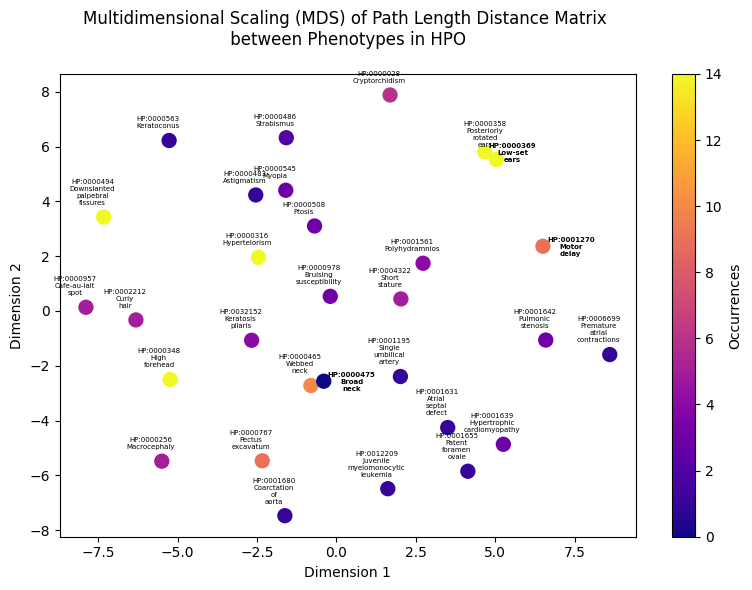

In [41]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
positions = mds.fit_transform(phenotypes_dist_matrix_df)

phenotype_labels = list(all_phenotype_counts_df['phenotype label'])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(positions[:, 0], positions[:, 1], marker='o', c=all_phenotype_counts_df['counts'], cmap='plasma', s=100)

for phenotype_id, label, x, y in zip(phenotypes_dist_matrix_df.index, phenotype_labels, positions[:, 0], positions[:, 1]):
    if phenotype_id in observed_phenotype_ids:
        plt.annotate(f'{phenotype_id}\n{label.replace(' ', '\n')}', xy=(x, y), xytext=(20, -8), textcoords='offset points', ha='center', va='bottom', fontsize=5, weight='bold')
    else:
        plt.annotate(f'{phenotype_id}\n{label.replace(' ', '\n')}', xy=(x, y), xytext=(-8, 8), textcoords='offset points', ha='center', va='bottom', fontsize=5)

plt.colorbar(scatter, label='Occurrences')

plt.title('Multidimensional Scaling (MDS) of Path Length Distance Matrix \n between Phenotypes in HPO \n')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(False)
plt.tight_layout()

plt.savefig('nras_matching_phenotypes.png')